In [1]:
import plot_map
import pandas as pd
#读取数据    
data = pd.read_csv('TaxiData-Sample.csv',header = None) 
data.columns = ['VehicleNum','time','slon','slat','OpenStatus','Speed'] 

In [2]:
#简要数据清洗
data = data.sort_values(by = ['VehicleNum','time'])
data = data[-((data['OpenStatus'] != data['OpenStatus'].shift())& 
(data['OpenStatus'] != data['OpenStatus'].shift(-1))& 
(data['VehicleNum'] == data['VehicleNum'].shift())& 
(data['VehicleNum'] == data['VehicleNum'].shift(-1)))] 

# 出租车GPS中提取OD

<AxesSubplot:>

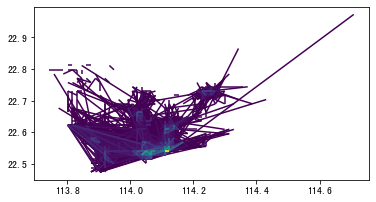

In [3]:
#从GPS数据提取OD
oddata = plot_map.taxigps_to_od(data,col = ['VehicleNum','time','slon','slat','OpenStatus'])
#获取栅格化参数
params = plot_map.grid_params(bounds = [113.7, 22.42, 114.3, 22.8],accuracy = 1500)
#栅格化OD并集计
od_gdf = plot_map.odagg(oddata,params,arrow = False)
od_gdf.plot(column = 'count')

# 快速可视化

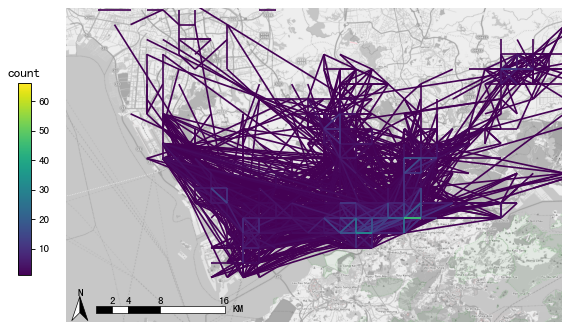

In [14]:
#创建图框
import matplotlib.pyplot as plt
import plot_map
fig =plt.figure(1,(8,8),dpi=80)
ax =plt.subplot(111)
plt.sca(ax)
#添加地图底图
plot_map.plot_map(plt,bounds,zoom = 12,style = 4)
#绘制colorbar
cax = plt.axes([0.05, 0.33, 0.02, 0.3])
plt.title('count')
plt.sca(ax)
#绘制栅格
od_gdf.plot(ax = ax,column = 'count',cax = cax,legend = True)
#添加比例尺和指北针
plot_map.plotscale(ax,bounds = bounds,textsize = 10,compasssize = 1,accuracy = 2000,rect = [0.06,0.03],zorder = 10)
plt.axis('off')
plt.xlim(bounds[0],bounds[2])
plt.ylim(bounds[1],bounds[3])
plt.show()